In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')



In [10]:
#path = "/kaggle/input/heart-disease/heart.csv"
df = pd.read_csv('heart.csv')


In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.shape


(303, 14)

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [16]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df.duplicated().sum()


1

In [18]:
df.drop_duplicates(inplace=True)


In [19]:
df.duplicated().sum()

0

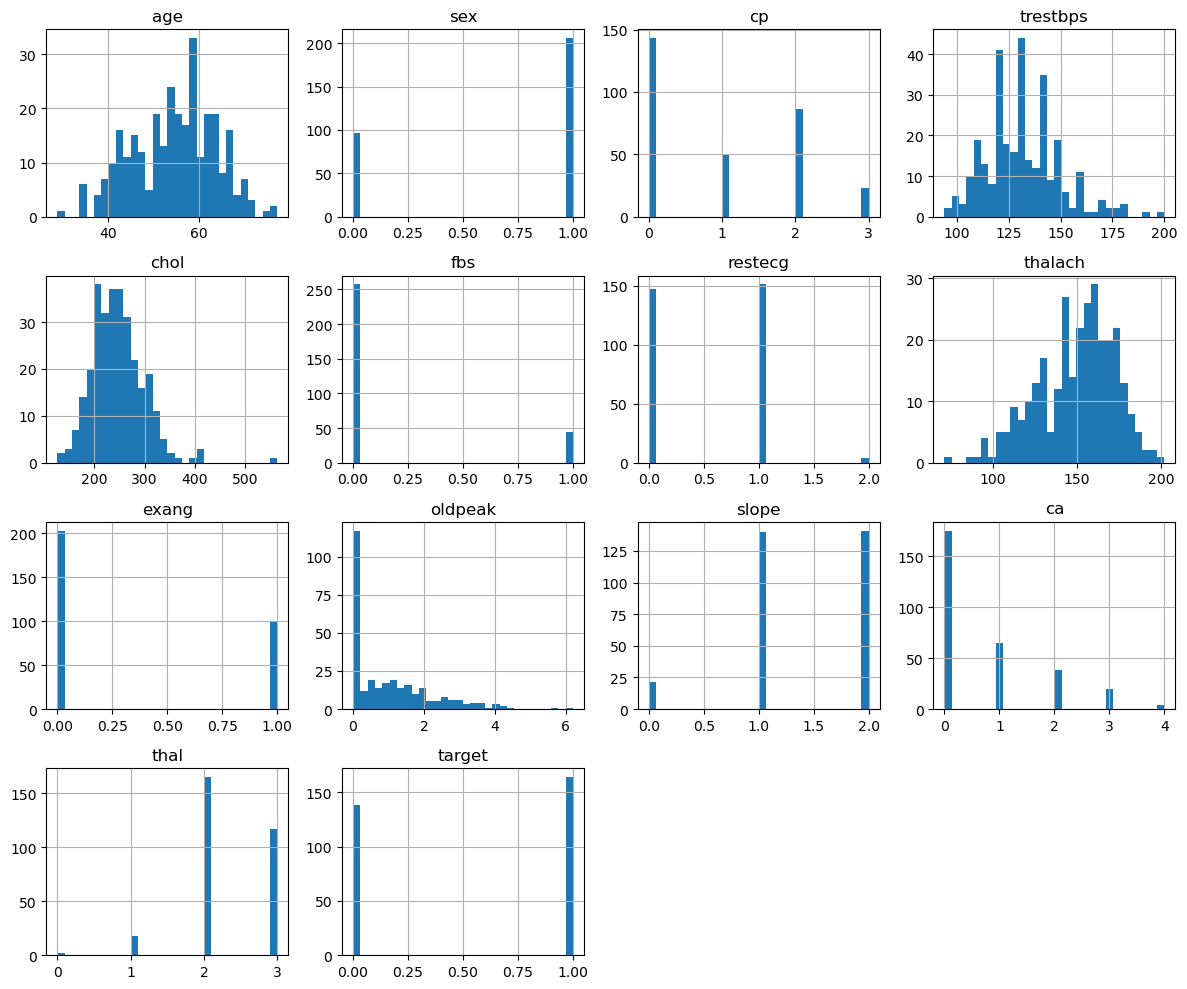

In [20]:
# Histogram for each feature
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


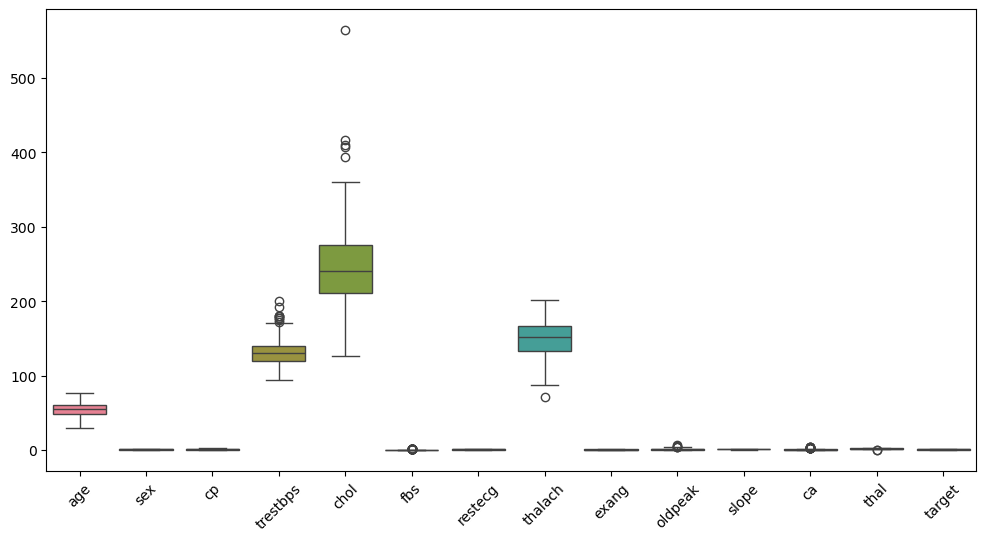

In [21]:
# Boxplot for each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


In [22]:
rows_before_outliers = df.shape[0]
rows_before_outliers



302

In [23]:
#Z_Score
for column in df.select_dtypes(include=['number']).columns:
    # Define upper and lower limits
    upper_limit = df[column].mean() + 3 * df[column].std()
    lower_limit = df[column].mean() - 3 * df[column].std()
    
    # Filter the DataFrame
    df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]


In [24]:
rows_after_outliers = df.shape[0]
rows_after_outliers

287

In [25]:
outliers = rows_before_outliers - rows_after_outliers
outliers

15

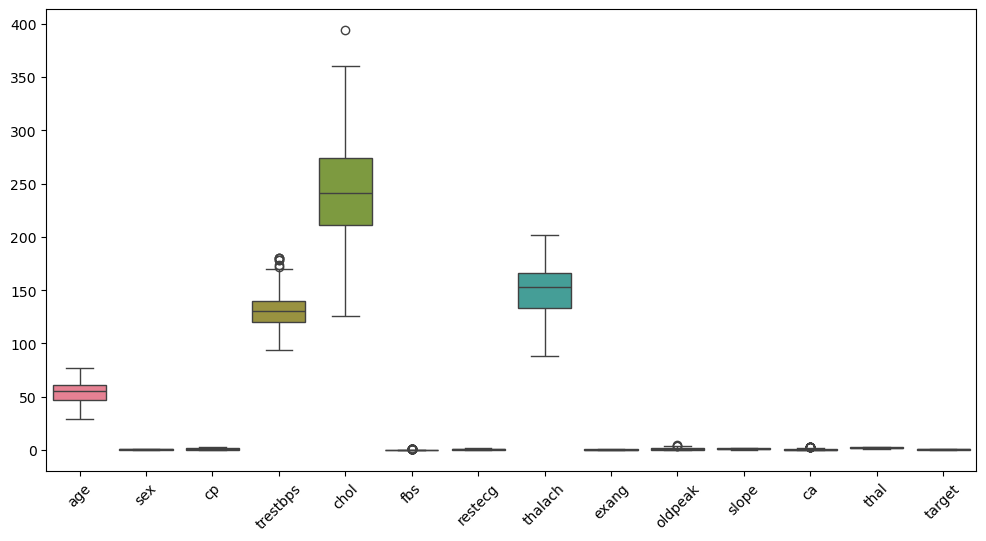

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

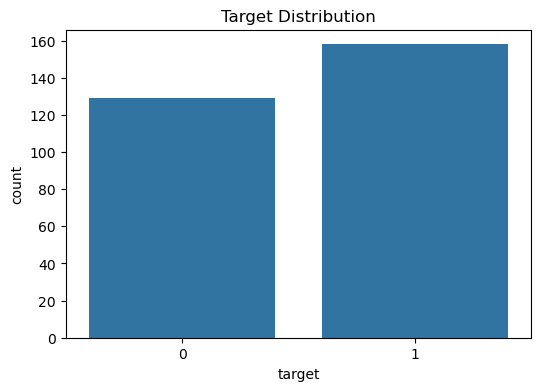

In [27]:
# Count plot for the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.show()


In [28]:
corr = df.corr()
corr


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.072391,-0.060168,0.304702,0.177192,0.133044,-0.103736,-0.400067,0.112509,0.193431,-0.155421,0.368764,0.055830,-0.226750
sex,-0.072391,1.000000,-0.054418,-0.039006,-0.141218,0.058432,-0.108164,-0.053999,0.146867,0.166430,-0.054768,0.135552,0.244047,-0.302926
cp,-0.060168,-0.054418,1.000000,0.071251,-0.098794,0.116757,0.040067,0.288385,-0.382699,-0.109039,0.079304,-0.214083,-0.152710,0.408570
trestbps,0.304702,-0.039006,0.071251,1.000000,0.143586,0.167890,-0.090480,-0.075059,0.065089,0.156988,-0.103302,0.057947,0.027382,-0.119281
chol,0.177192,-0.141218,-0.098794,0.143586,1.000000,-0.005337,-0.101245,-0.030874,0.085002,0.032452,0.011007,0.113238,0.049204,-0.099821
fbs,0.133044,0.058432,0.116757,0.167890,-0.005337,1.000000,-0.073003,-0.007962,-0.009093,0.003692,-0.046927,0.151021,-0.014622,-0.011438
restecg,-0.103736,-0.108164,0.040067,-0.090480,-0.101245,-0.073003,1.000000,0.054974,-0.072134,-0.038347,0.088423,-0.084350,0.011584,0.130079
thalach,-0.400067,-0.053999,0.288385,-0.075059,-0.030874,-0.007962,0.054974,1.000000,-0.392686,-0.353441,0.379395,-0.297154,-0.123956,0.431519
exang,0.112509,0.146867,-0.382699,0.065089,0.085002,-0.009093,-0.072134,-0.392686,1.000000,0.298277,-0.240616,0.153605,0.222884,-0.429082
oldpeak,0.193431,0.166430,-0.109039,0.156988,0.032452,0.003692,-0.038347,-0.353441,0.298277,1.000000,-0.546473,0.260600,0.175196,-0.424443


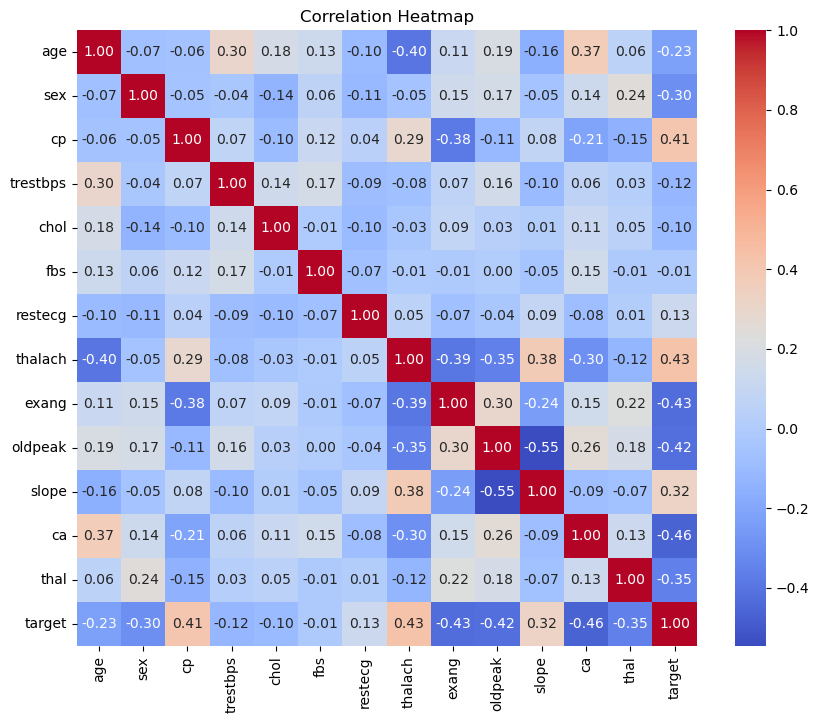

In [29]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [30]:
x = df.drop(['target'], axis=1)
y = df.target


In [31]:
sc = StandardScaler()
x[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']] = sc.fit_transform(x[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']])


In [32]:
x


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.954638,1,3,0.823925,-0.250907,1,0,0.008668,0,1.200521,-2.327663,-0.713426,-2.250516
1,-1.909660,1,2,-0.060392,0.119943,0,1,1.652290,0,2.312868,-2.327663,-0.713426,-0.537258
2,-1.468998,0,1,-0.060392,-0.883533,0,0,0.985957,0,0.366261,0.971296,-0.713426,-0.537258
3,0.183481,1,1,-0.649938,-0.185463,0,1,1.252490,0,-0.189913,0.971296,-0.713426,-0.537258
4,0.293646,0,0,-0.649938,2.388672,0,1,0.586157,1,-0.375304,0.971296,-0.713426,-0.537258
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.293646,0,0,0.529153,-0.076389,0,1,-1.190733,1,-0.746087,-0.678183,-0.713426,1.175999
299,-1.028337,1,3,-1.239483,0.425349,0,1,-0.790932,0,0.180869,-0.678183,-0.713426,1.175999
300,1.505464,1,0,0.764971,-1.123495,1,1,-0.391132,0,2.220173,-0.678183,1.453275,1.175999
301,0.293646,1,0,-0.060392,-2.476007,0,1,-1.546110,1,0.180869,-0.678183,0.369925,1.175999


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [34]:
imuter = SimpleImputer(strategy='mean')


In [35]:
pipline = make_pipeline(imuter, LogisticRegression())


In [36]:
params_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'lbfgs'],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__max_iter': [100, 200, 300]
}


In [37]:
grid_search = GridSearchCV(pipline, params_grid, cv=5, scoring='accuracy')


In [38]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                         'logisticregression__max_iter': [100, 200, 300],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [39]:
model = grid_search.best_estimator_


In [40]:
y_pred = model.predict(x_test)


In [41]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [42]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.86
Confusion Matrix:
[[27  7]
 [ 5 48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        34
           1       0.87      0.91      0.89        53

    accuracy                           0.86        87
   macro avg       0.86      0.85      0.85        87
weighted avg       0.86      0.86      0.86        87



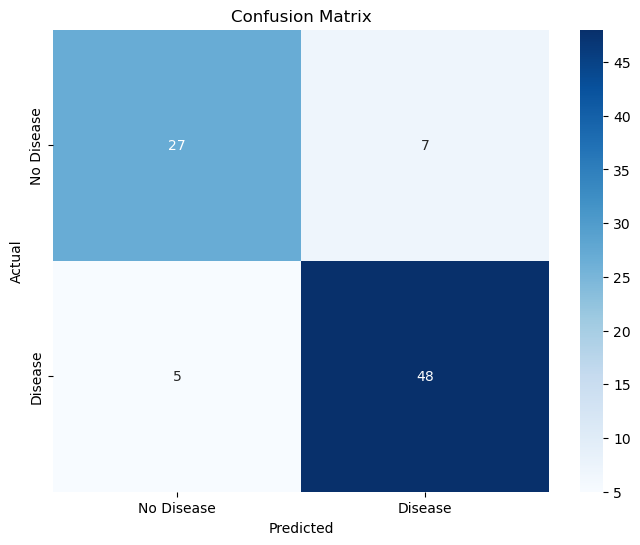

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='Blues',
           xticklabels=['No Disease','Disease'],
           yticklabels=['No Disease','Disease'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()
